<a href="https://colab.research.google.com/github/Disha-Panda/Dog_vs_Cat_Prediction/blob/main/dogvscat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [60]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [61]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [62]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras import Sequential

In [63]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=50,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [64]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=50,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [65]:
def process(image,labels):
  image=tensorflow.cast(image/255.,tensorflow.float32)
  return image,labels

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [66]:
from keras.layers.rnn.cell_wrappers import DropoutWrapper
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3),))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [67]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
400/400 [==============================] - 65s 152ms/step - loss: 0.6782 - accuracy: 0.6429 - val_loss: 0.6784 - val_accuracy: 0.6206
Epoch 2/10
400/400 [==============================] - 61s 150ms/step - loss: 0.5042 - accuracy: 0.7548 - val_loss: 0.7033 - val_accuracy: 0.6674
Epoch 3/10
400/400 [==============================] - 61s 152ms/step - loss: 0.4180 - accuracy: 0.8091 - val_loss: 0.4653 - val_accuracy: 0.7812
Epoch 4/10
400/400 [==============================] - 61s 151ms/step - loss: 0.3345 - accuracy: 0.8529 - val_loss: 0.4825 - val_accuracy: 0.8014
Epoch 5/10
400/400 [==============================] - 60s 149ms/step - loss: 0.2440 - accuracy: 0.8978 - val_loss: 0.5661 - val_accuracy: 0.7748
Epoch 6/10
400/400 [==============================] - 66s 165ms/step - loss: 0.1696 - accuracy: 0.9327 - val_loss: 0.5767 - val_accuracy: 0.7920
Epoch 7/10
400/400 [==============================] - 60s 150ms/step - loss: 0.1099 - accuracy: 0.9582 - val_loss: 0.8036 - val_ac

In [69]:
import matplotlib.pyplot as plt

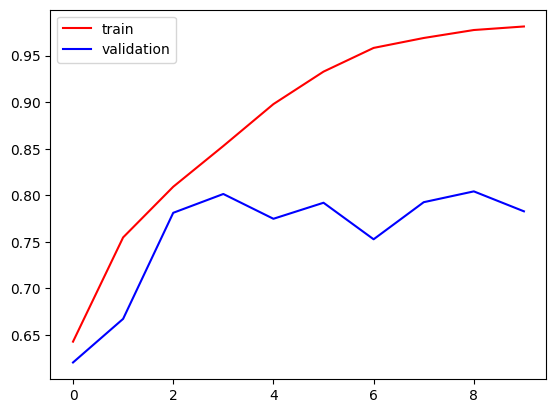

In [70]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [71]:
import cv2

In [120]:
test_img=cv2.imread('/content/dog.jpeg')

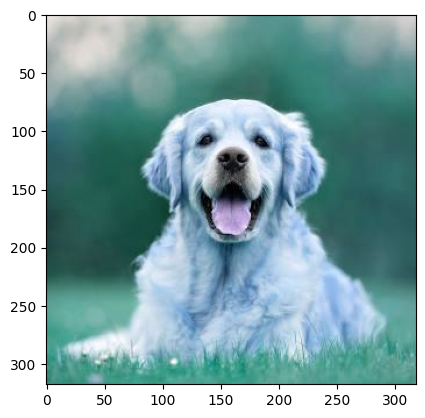

In [121]:
plt.imshow(test_img)

In [122]:
test_img.shape

(318, 318, 3)

In [126]:
test_img=cv2.resize(test_img,(256,256))

In [127]:
test_input=test_img.reshape((1,256,256,3))

In [128]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)